---
# **Business Understanding: Saudi Used Cars**
---

### **a. Context**
The used car industry has a positive trend, especially after Covid-19. The used car industry in Saudi Arabia is expected to recover from the Covid-19 pandemic. According to [Ken Research](https://www.kenresearch.com/industry-reports/saudi-arabia-used-car-industry), The used car industry in Saudi Arabia has grown at a CAGR of 0.8% based on gross transaction value over the period 2014-2019 and declined at a CAGR of -2.4% based on sales volume. They categorize used car market segmentations into several points:
* Type of Cars
* Car Brands
* Age of Vehicle
* Kilometers Driven
* Type of Sourcing

The rise of online platforms has made C2C transactions more convenient, and the easy availability of finance in peer-to-peer transactions has become one contributing factor. Online platforms are expected to leverage the latest technologies, such as artificial intelligence and virtual reality, to enhance user browsing experience. The country's overall used-to-new car sales ratio is also expected to improve. 

### **b. Problem Statement**
The industry is highly fragmented and competitive, with 2,200+ dealerships operating in the market. Many brands have a certified pre-owned car program in place in the country. Amongst the brand authorized dealerships, the top 6 players, including Abdul Latif Jameel Motors, Aljomaih Automotive Company, Al Jazirah Vehicles, Universal Motors & Gulf Advantage, are analyzed to account for almost half of the used car sales through the authorized dealerships.

* **Problem:** The used car market in Saudi Arabia is highly competitive and fragmented. By automating their processes, they want to save time and reduce their opex(operational expenditure). 
* **Solution:** Automate the process of used car sales using AI and machine learning, especially for price predictions based on several aspects and conditions.

### **c. Goals**
The goal of this project is to develop a system that can help the used car industry determine the price of used cars. The system will analyze the data and provide the best prediction of the price of the used car based on important factors. This analytics system will help the industry gain a competitive advantage by evaluating the price of the used car and providing accurate price predictions automatically.

### **d. Implementation**

  * **Used Cars App/Web:** A user-friendly interface for users to input the used car details and get the price prediction. The model can be integrated into the app/web to predict prices. 

  * **Car Dealership:** Automate car pricing for trade-ins or resale based on market conditions.

  * **Loan Providers:** Assess car value to determine loan eligibility and interest rates.

  * **Insurances Companies:** Estimate premiums based on car features and predicted depreciation.

### **e. Evaluation Metrics**
The evaluation metrics for this project will be based on the machine learning model used, which, in this case, is supervised learning (regression). The metrics used to evaluate the model are: 
* **Mean Absolute Error (MAE)**

 Mean Absolute Error (MAE) is the average of the absolute differences between predicted and actual values. It provides a straightforward measure of how much, on average, the model's predictions deviate from the actual values without considering the direction of the error. A lower MAE indicates better model performance because the predictions are closer, on average, to the exact values.
* **Root Mean Square Error (RMSE)**

 Root Mean Squared Error (RMSE) is the square root of the average of the squared differences between the predicted and actual values. A lower RMSE indicates better performance and is expressed in the same units as the target variable.
* **Mean Absolute Percentage Error (MAPE)**

 Mean Absolute Percentage Error (MAPE) measures the average absolute percentage difference between the predicted and actual values. It expresses the error as a percentage, making it easier to interpret. A lower MAPE indicates better model performance. 
* **R-Squared (R2).**

 R-squared (R²) is a statistical measure that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates how well the model fits the data. An R² value closer to 1 indicates a better fit, meaning the model explains most of the variance in the target variable.


## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
pd.options.mode.chained_assignment = None  # default='warn'

**Data Information**

| **Feature** | **Explanation** |
|--------- | ---------- |
| Type | Type of used car. |
| Region | The region in which the used car was offered for sale. |
| Make | The company name. |
| Gear_Type | Gear type size of used car. |
| Origin | Origin of used car. |
| Options | Options of used car. |
| Year | Manufacturing year. |
| Engine_Size | the engine size of used car. |
| Mileage | The mileage of used car. |
| Negotiable | True if the price is 0, that means it is negotiable. |
| Price | The price of used car. |



## Data Collecting

In [2]:
df = pd.read_csv('dataset/data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


---
# **Exploratory Data Analysis (EDA)**
---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
pd.DataFrame({
  'feature' : df.columns.values,
  'data_type' : df.dtypes.values,
  'n_unique' : df.nunique().values,
  'sample_unique' : [df[i].unique() for i in df.columns]
})

,feature,data_type,n_unique,sample_unique
0,Type,object,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3,..."
1,Region,object,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, ..."
2,Make,object,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche,..."
3,Gear_Type,object,2,"[Manual, Automatic]"
4,Origin,object,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,3,"[Standard, Full, Semi Full]"
6,Year,int64,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 199..."
7,Engine_Size,float64,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, ..."
8,Mileage,int64,1716,"[421000, 80000, 140000, 220000, 49000, 25000, ..."
9,Negotiable,bool,2,"[True, False]"


### Missing Values

In [5]:
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(4)

In [7]:
display(df.describe(include=object), df.describe())

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


**Insight:**
* The dataset consist 5624 rows and 11 columns.
* The dataset has several data type that can be grouped as follows:
  + Integer: 3 columns (Year, Mileage, and Price)
  + Float: 1 column (Engine_Size)
  + Object: 6 columns (Type, Region, phone, Make, Gear_Type, and Options)
  + Boolean: 1 column (Negotiable)
* There aren't find any missing value on the dataset
* The dataset has 4 duplicate values.
* Based on the summary statistics, several columns has wide range between min-max values:
  + `Year` column with min value 1963 and max value 2022. It mean that the range is 59 year.
  + `Mileage` column with min value 100 and max value 20,000,000 wich are huge difference between them and it's tend to be outliers.
  + `Price` column with min value is 0 which is impossible for a car price.

### Distribution Analysis

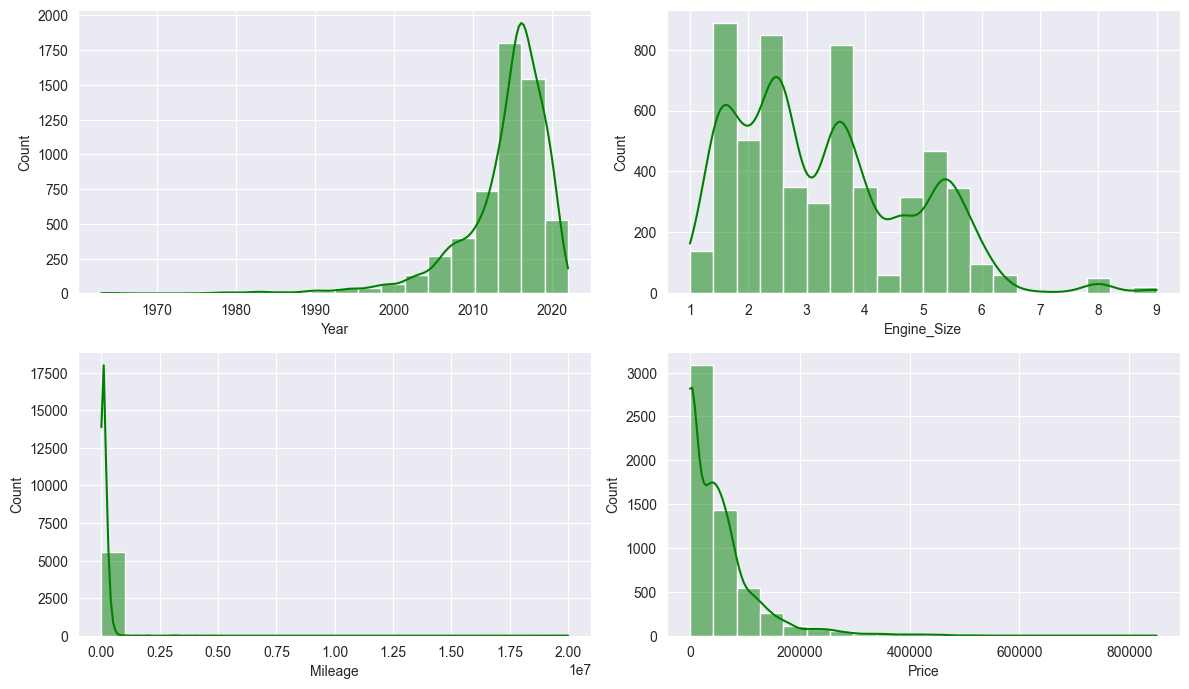

In [8]:
# Numerical features distribution

num_features = df.select_dtypes(include='number')
plt.figure(figsize=(12,7))
for i, column in enumerate(num_features.columns, 1):
  plt.subplot(2, 2, i)
  sns.histplot(df[column], bins=20, kde=True, color='g')
plt.tight_layout()
plt.show()

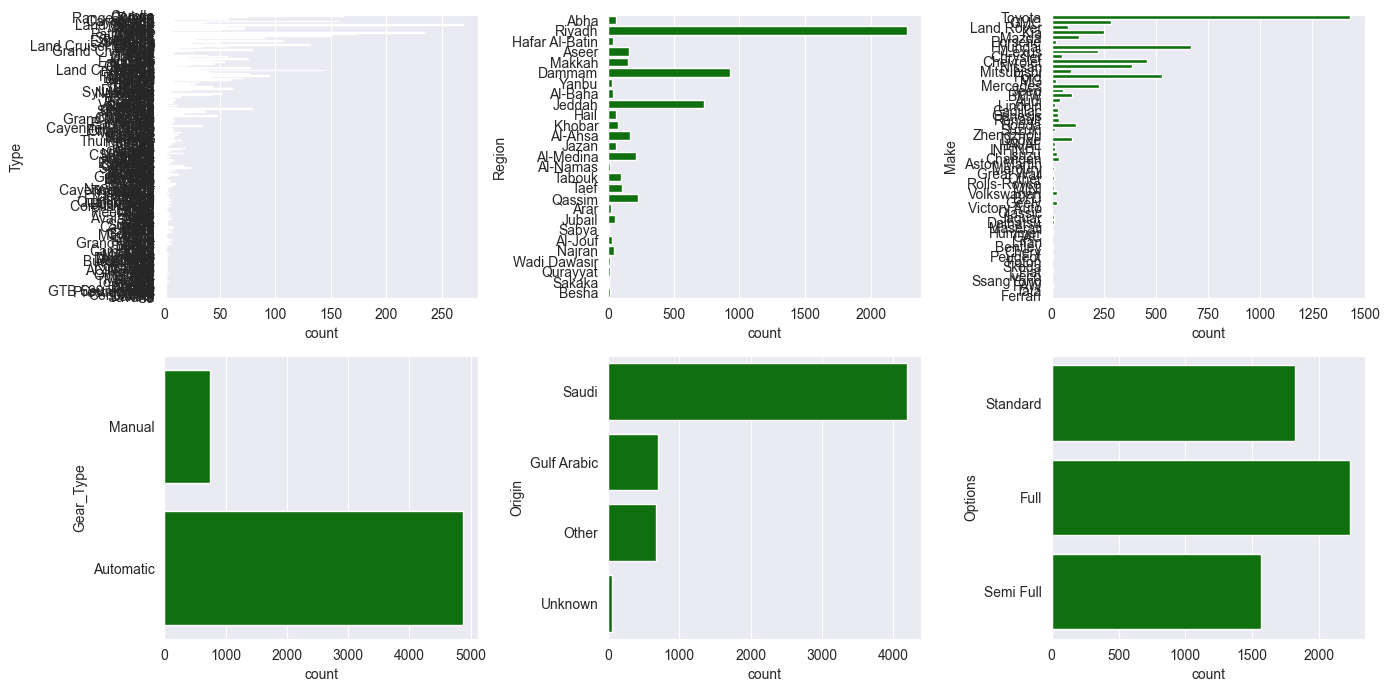

In [9]:
# Categorical features distribution
cat_features = df.select_dtypes(include='object')
plt.figure(figsize=(14,10))
for i, column in enumerate(cat_features.columns, 1):
  plt.subplot(3, 3, i)
  sns.countplot(df[column], color='g')
plt.tight_layout()
plt.show()


**1. Region**

In [10]:
df.Region.value_counts().head()

Region
Riyadh       2272
Dammam        925
Jeddah        733
Qassim        225
Al-Medina     214
Name: count, dtype: int64

**2. Make**

In [11]:
df['Make'].value_counts().head()

Make
Toyota       1431
Hyundai       670
Ford          530
Chevrolet     458
Nissan        387
Name: count, dtype: int64

In [12]:
df.groupby(by=['Make']).agg({'Price' : 'mean'}).\
sort_values(by='Price', ascending=False).round(1).head(10)

,Price
Make,
Rolls-Royce,476666.7
Bentley,388750.0
Aston Martin,290000.0
Ferrari,280000.0
Maserati,211666.7
Land Rover,186626.6
Mercedes,125411.5
Jaguar,116666.7
Lexus,116461.7


The `Make` featrues should be filled with car brand manufacature, but it was founded meaningless value such as 'Other', 'Classic'. And after doing research, 'Victory Auto' is a car seller company. Those data should be deleted to prevent the data quality issue.


In [13]:
df[df['Make'].isin(['Other', 'Classic', 'Victory Auto'])]
df = df[~df['Make'].isin(['Other', 'Classic', 'Victory Auto'])]

**3. Origin**

In [14]:
df['Origin'].value_counts()

Origin
Saudi          4183
Gulf Arabic     697
Other           671
Unknown          61
Name: count, dtype: int64

In [15]:
origin_stat = df.groupby('Origin', as_index=False).agg({
  'Price': ['mean', 'min', 'max'],
})

C:\Users\User\AppData\Local\Temp\ipykernel_16656\3655677009.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_16656\3655677009.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


[Text(0, 0, 'Qassim'),
 Text(1, 0, 'Riyadh'),
 Text(2, 0, 'Abha'),
 Text(3, 0, 'Jubail'),
 Text(4, 0, 'Al-Medina'),
 Text(5, 0, 'Jeddah'),
 Text(6, 0, 'Dammam'),
 Text(7, 0, 'Al-Ahsa'),
 Text(8, 0, 'Tabouk'),
 Text(9, 0, 'Aseer'),
 Text(10, 0, 'Al-Baha'),
 Text(11, 0, 'Taef'),
 Text(12, 0, 'Al-Jouf')]

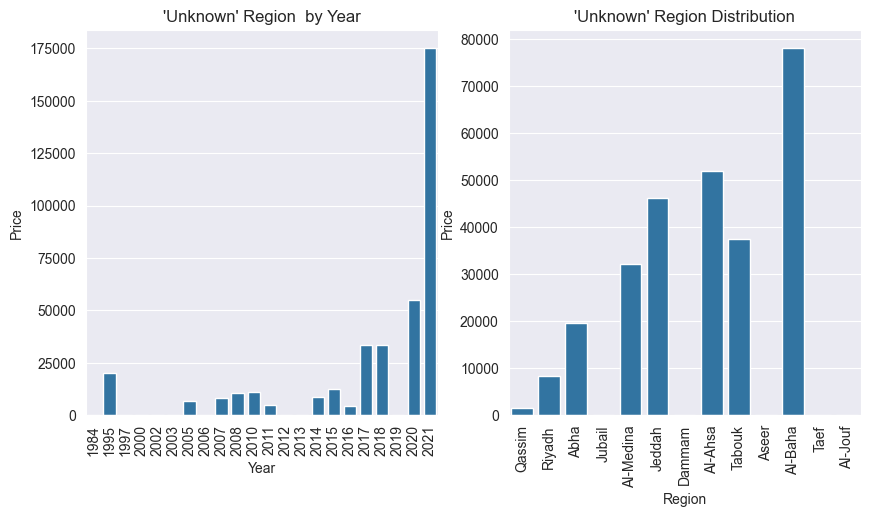

In [16]:
unknown_origin = df[df['Origin'] == 'Unknown']
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.barplot(unknown_origin, x='Year', y= 'Price', ax= axes[0], errorbar=None).set_title("'Unknown' Region  by Year")
sns.barplot(unknown_origin, x='Region', y= 'Price', ax= axes[1], errorbar=None).set_title("'Unknown' Region Distribution")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


C:\Users\User\AppData\Local\Temp\ipykernel_16656\3139671324.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_16656\3139671324.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


[Text(0, 0, 'Riyadh'),
 Text(1, 0, 'Jeddah'),
 Text(2, 0, 'Tabouk'),
 Text(3, 0, 'Qassim'),
 Text(4, 0, 'Al-Medina'),
 Text(5, 0, 'Dammam'),
 Text(6, 0, 'Taef'),
 Text(7, 0, 'Al-Ahsa'),
 Text(8, 0, 'Aseer'),
 Text(9, 0, 'Yanbu'),
 Text(10, 0, 'Abha'),
 Text(11, 0, 'Al-Baha'),
 Text(12, 0, 'Al-Jouf'),
 Text(13, 0, 'Arar'),
 Text(14, 0, 'Jazan'),
 Text(15, 0, 'Hafar Al-Batin'),
 Text(16, 0, 'Hail'),
 Text(17, 0, 'Khobar'),
 Text(18, 0, 'Al-Namas'),
 Text(19, 0, 'Makkah'),
 Text(20, 0, 'Besha'),
 Text(21, 0, 'Najran'),
 Text(22, 0, 'Jubail'),
 Text(23, 0, 'Qurayyat'),
 Text(24, 0, 'Wadi Dawasir'),
 Text(25, 0, 'Sabya')]

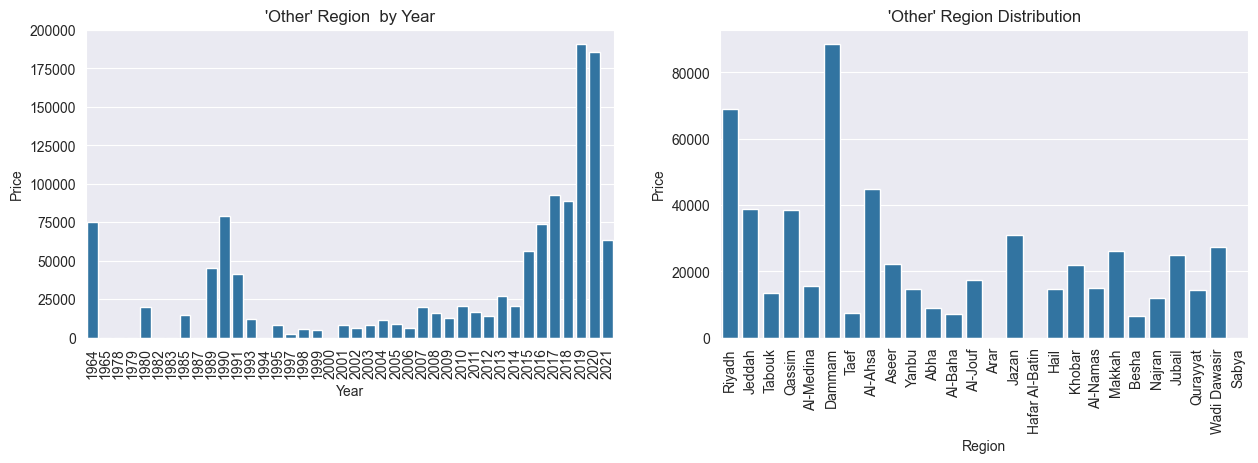

In [17]:
other_origin = df[df['Origin'] == 'Other']

fig, axes = plt.subplots(1,2, figsize=(15,4))
sns.barplot(other_origin, x='Year', y= 'Price', ax= axes[0], errorbar=None).set_title("'Other' Region  by Year")
sns.barplot(other_origin, x='Region', y= 'Price', ax= axes[1], errorbar=None).set_title("'Other' Region Distribution")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

`Origin` feature is data that inform origin of used car. In business, is make sense if as sellers of used car didn't know of all origin cars from. 'Other' and 'Unknown' have big amount percentage of the data. Both have same meaning and didn't have certain pattern. So, I decided to combine them into one category 'Other'

In [18]:
# Join unknown become other origin
df['Origin'] = df['Origin'].replace({'Unknown' : 'Other'})
df['Origin'].value_counts()

Origin
Saudi          4183
Other           732
Gulf Arabic     697
Name: count, dtype: int64

**Price**

In [19]:
df['Price'].describe()

count      5612.000000
mean      53073.592837
std       70070.878552
min           0.000000
25%           0.000000
50%       36500.000000
75%       73000.000000
max      850000.000000
Name: Price, dtype: float64

In [20]:
df['Price'].sort_values() 

19           0
2255         0
2252         0
5584         0
5583         0
         ...  
4653    599000
2120    620000
4273    748000
4684    800000
3513    850000
Name: Price, Length: 5612, dtype: int64

Text(0.5, 1.0, 'Price distribution by Year ')

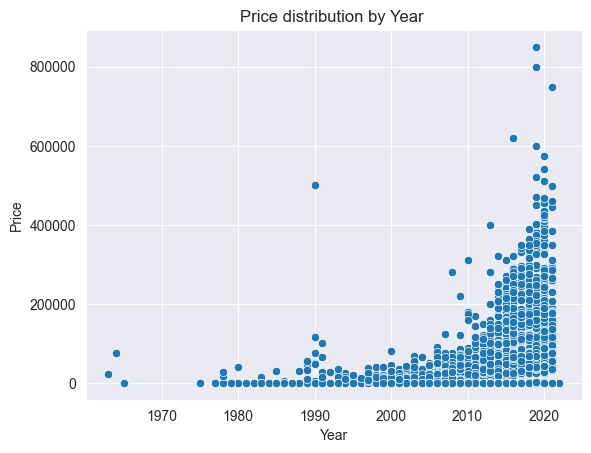

In [21]:
sns.scatterplot(df, x='Year', y='Price')
plt.title('Price distribution by Year ')

There was found cars with price 0 and 1 on the dataset which mean impossible.

In [22]:
price_0 = df[(df['Price'] == 0) | (df['Price'] == 1)]
price_0['Price'].value_counts()

Price
0    1792
1       1
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_16656\3571931462.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_16656\3571931462.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


[Text(0, 0, 'False'), Text(1, 0, 'True')]

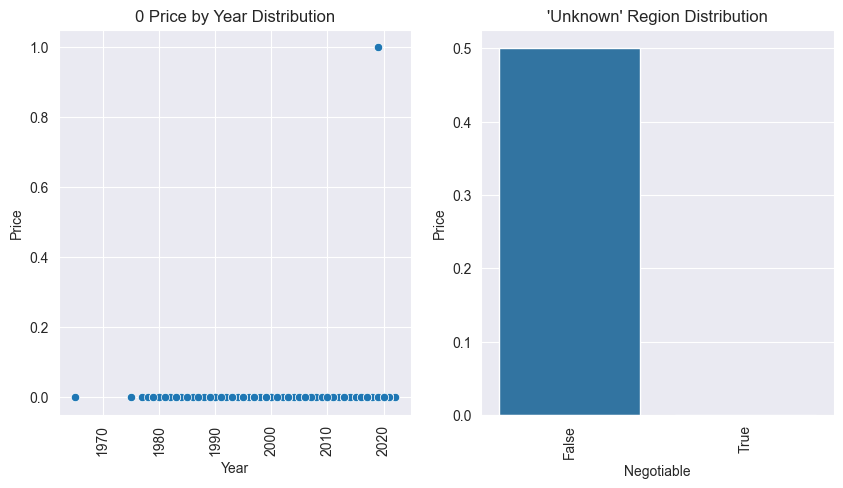

In [23]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(price_0, x='Year', y='Price', ax=axes[0]).set_title('0 Price by Year Distribution')
sns.barplot(price_0, x='Negotiable', y= 'Price', ax= axes[1], errorbar=None).set_title("'Unknown' Region Distribution")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

**4. Engine Size vs Price**

Text(0.5, 1.0, 'Engine vs Price')

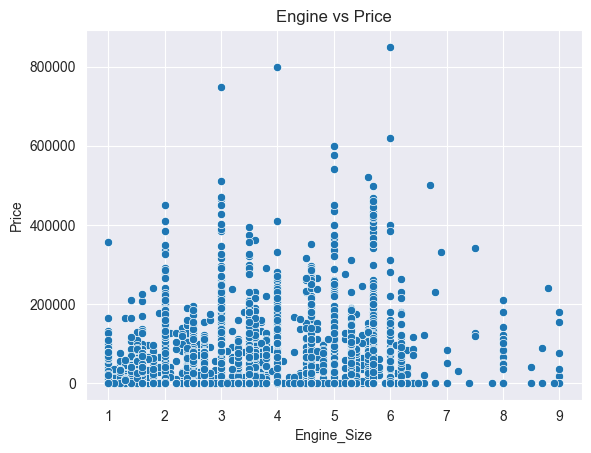

In [24]:
sns.scatterplot(df, x='Engine_Size', y='Price').set_title('Engine vs Price')

**5. Year vs Price**

<Axes: xlabel='Year', ylabel='Price'>

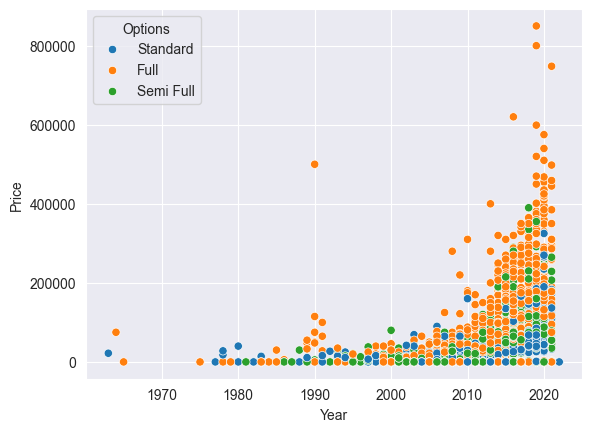

In [25]:
sns.scatterplot(df, x='Year', y='Price', hue='Options')

**Insight:**
* From visualization we can see that Price and Year have polynominal pattern. 
* Bigger year tend to be have higer price. 
* The data dominated by Full options.

**6. Mileage vs Price**

In [26]:
df['Mileage'].describe()

count    5.612000e+03
mean     1.511673e+05
std      3.831975e+05
min      1.000000e+02
25%      3.800000e+04
50%      1.030000e+05
75%      1.960000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

In [27]:
df['Mileage'].median()

np.float64(103000.0)

<Axes: xlabel='Mileage', ylabel='Price'>

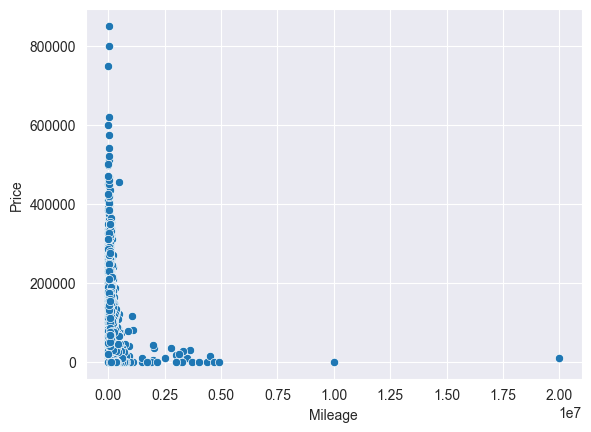

In [28]:
sns.scatterplot(df, x='Mileage', y='Price')

**Insight:**
* The data have extreme values, it tend to be outliers. It can be shown with range between median and max values of the data is to large.
* The data are not normally distributed, it is skewed to the right.

---
# **Data Preprocessing**
---

### Handling Duplicate

In [29]:
df.drop_duplicates(inplace=True)

### Handling Outliers

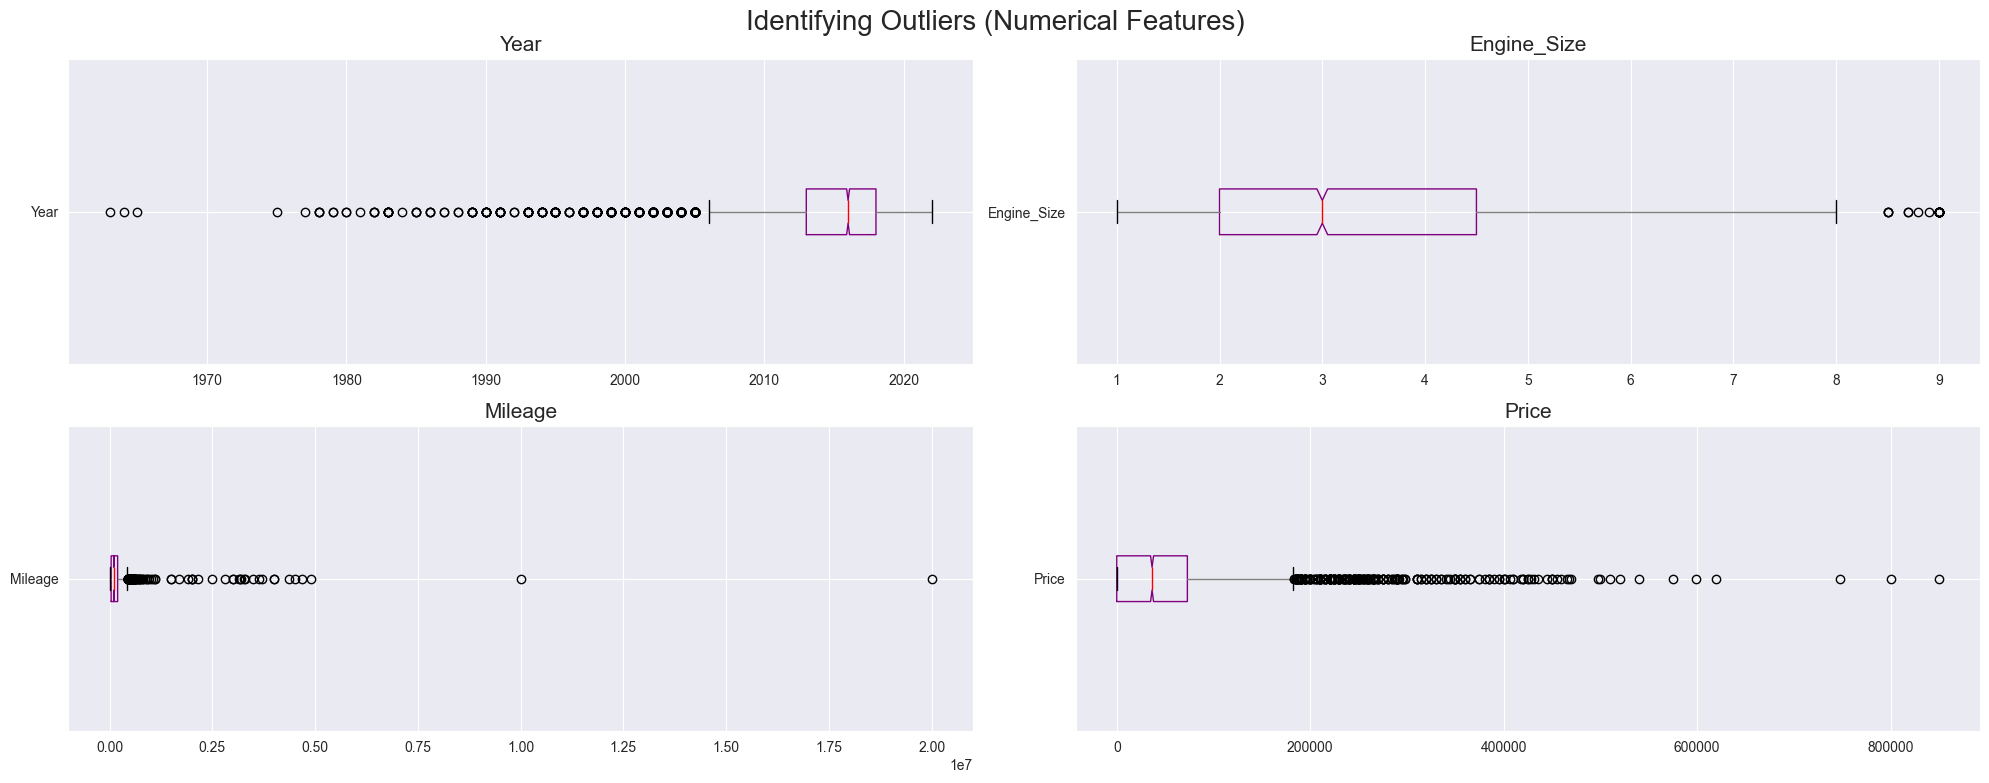

In [30]:
num_features = df.select_dtypes('number')
plot = 1
plt.figure(figsize=(20,15))
for feature in num_features:
  plt.subplot(4,2,plot)
  df.boxplot(column=feature, whis=1.5, grid=True, vert=False, notch=True, color=dict(boxes='purple', whiskers='Gray', medians='Red', caps='Black'))
  plt.title(feature, size=15)
  plt.tight_layout()
  plot += 1
plt.suptitle('Identifying Outliers (Numerical Features)', size=20)
plt.tight_layout()
plt.show()

In [31]:
def find_outliers(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  limit = iqr*1.5
  print(f'IQR: {iqr}')

  lower_limit = q1 - limit
  upper_limit = q3 + limit
  print(f'lower bound: {lower_limit}')
  print(f'upper bound: {upper_limit}')

for feature in num_features.columns:
    print(f'\nIQR of {feature}')
    find_outliers(num_features[feature])



IQR of Year
IQR: 5.0
lower bound: 2005.5
upper bound: 2025.5

IQR of Engine_Size
IQR: 2.5
lower bound: -1.75
upper bound: 8.25

IQR of Mileage
IQR: 158000.0
lower bound: -199000.0
upper bound: 433000.0

IQR of Price
IQR: 73000.0
lower bound: -109500.0
upper bound: 182500.0


**1. Engine_Size**

In [32]:
df.shape

(5608, 11)

Engine size is measurement of total volume of cylinder in a car's engine capacity. Engine size is usually measured in liters (L) or cubic centimeters (cc). Larger engine size generally able to burn more fuel and produce more puwer. Based on upper limit of IQR, engine size is 7, but based on domain knowledge size engine > 6 usually is a super car or truck. Difference size engine between 6 and 7 is 65 rows which is 1.15% from the dataset. Based on this consideration we will drop value of size engine >6.

In [33]:
df[(df['Engine_Size'] > 6) & (df['Engine_Size'] < 7)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
32,Tahoe,Riyadh,Chevrolet,Automatic,Other,Semi Full,2017,6.2,105920,False,149000
78,Escalade,Riyadh,Cadillac,Automatic,Saudi,Full,2011,6.2,270373,True,0
233,GLE,Riyadh,Mercedes,Automatic,Other,Full,2020,6.9,24000,False,330000
501,Sierra,Riyadh,GMC,Automatic,Saudi,Full,2015,6.2,137000,True,0
562,Caprice,Riyadh,Chevrolet,Automatic,Saudi,Standard,2015,6.2,268041,False,75000
...,...,...,...,...,...,...,...,...,...,...,...
5263,Camaro,Tabouk,Chevrolet,Automatic,Saudi,Full,2010,6.2,258,True,0
5328,The 7,Riyadh,BMW,Automatic,Saudi,Semi Full,2018,6.8,18000,False,230000
5330,Sierra,Riyadh,GMC,Automatic,Saudi,Full,2017,6.2,124418,False,120000
5374,Caprice,Jeddah,Chevrolet,Automatic,Saudi,Full,2009,6.2,200,False,70000


In [34]:
# df[df['Engine_Size'] > 6]
df = df[~(df['Engine_Size'] > 6)]

**2. Year**

Based on IQR result, lower bound of the Year is 2005. Based on the boxplot above, we can see that several data become extreme outliers in several points. Based on domain knowledge, the lowest year i was found from several e-commerce on Arab Saudi [carswitch.com](https://carswitch.com/uae/used-cars/search) and [cars.saudisale](https://cars.saudisale.com/) website is 1980, and it can be classic models car, in Arab Saudi used car bellow 2000 rarely found. In this case, for research purpose condiseration i will drop year bellow 1980 and retain some outliers in the dataset.

In [35]:
year_val = pd.DataFrame(df['Year'].value_counts()).reset_index()
year_val.sort_values(by='Year')


,Year,count
46,1963,1
44,1964,1
43,1977,1
41,1978,2
36,1979,2
40,1980,2
47,1981,1
35,1982,2
30,1983,6
45,1984,1


In [36]:
df = df[~(df['Year'] < 1980)]

**3. Mileage**

Based on lower bound IQR Mileage feature is -199.000 which mean isn't make sense. The highest mileage i was found in [carswitch.com](https://carswitch.com/uae/used-cars/search) and [cars.saudisale](https://cars.saudisale.com/) website arround 250.000Km- 500.000Km. Dealler rarelly sell used cars above 500.000Km, so in this case we will drop extreme data based on boxplot of the Mileage > 500.000Km.

In [37]:
# df[df['Mileage'] == df['Mileage'].max() ]

In [38]:
df = df[~(df['Mileage'] > 500000)]
df.shape

(5366, 11)

**4. Price**

As another information, the prices of used cars in Saudi Arabia vary depending on the make, model, year, and etc. The lowest price i was found in [carswitch.com](https://carswitch.com/uae/used-cars/search) and [cars.saudisale](https://cars.saudisale.com/) website is 5.000SAR. In this case for reseaerch purpose, i will drop price with 0 and 1 value where those values aren't make sense for business context. It might indicate that the price was not provided or is missing, also be a data entry error, where the price was incorrectly recorded as 0 or 1. 

And based on utliers there are so many data above upper boundary, we consider to retain several value to mitigate information loss and only drop the data with extreme price values >500.000SAR.

In [39]:
df[df['Price'] == 0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [40]:
df[(df['Price']<=5000) | (df['Price']>=500000)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [41]:
price_val = pd.DataFrame(df['Price'].value_counts()).reset_index()
price_val.sort_values(by='Price', ascending=True).head(10)


,Price,count
0,0,1667
407,1,1
434,500,1
460,850,1
412,884,1
397,950,1
424,988,1
414,993,1
352,1000,1
423,1002,1


In [42]:
df = df[(df['Price'] >= 5000) & (df['Price'] <= 500000)]
df.shape

(3623, 11)

**Recheck missing value, duplicate value, outliers**

In [43]:
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

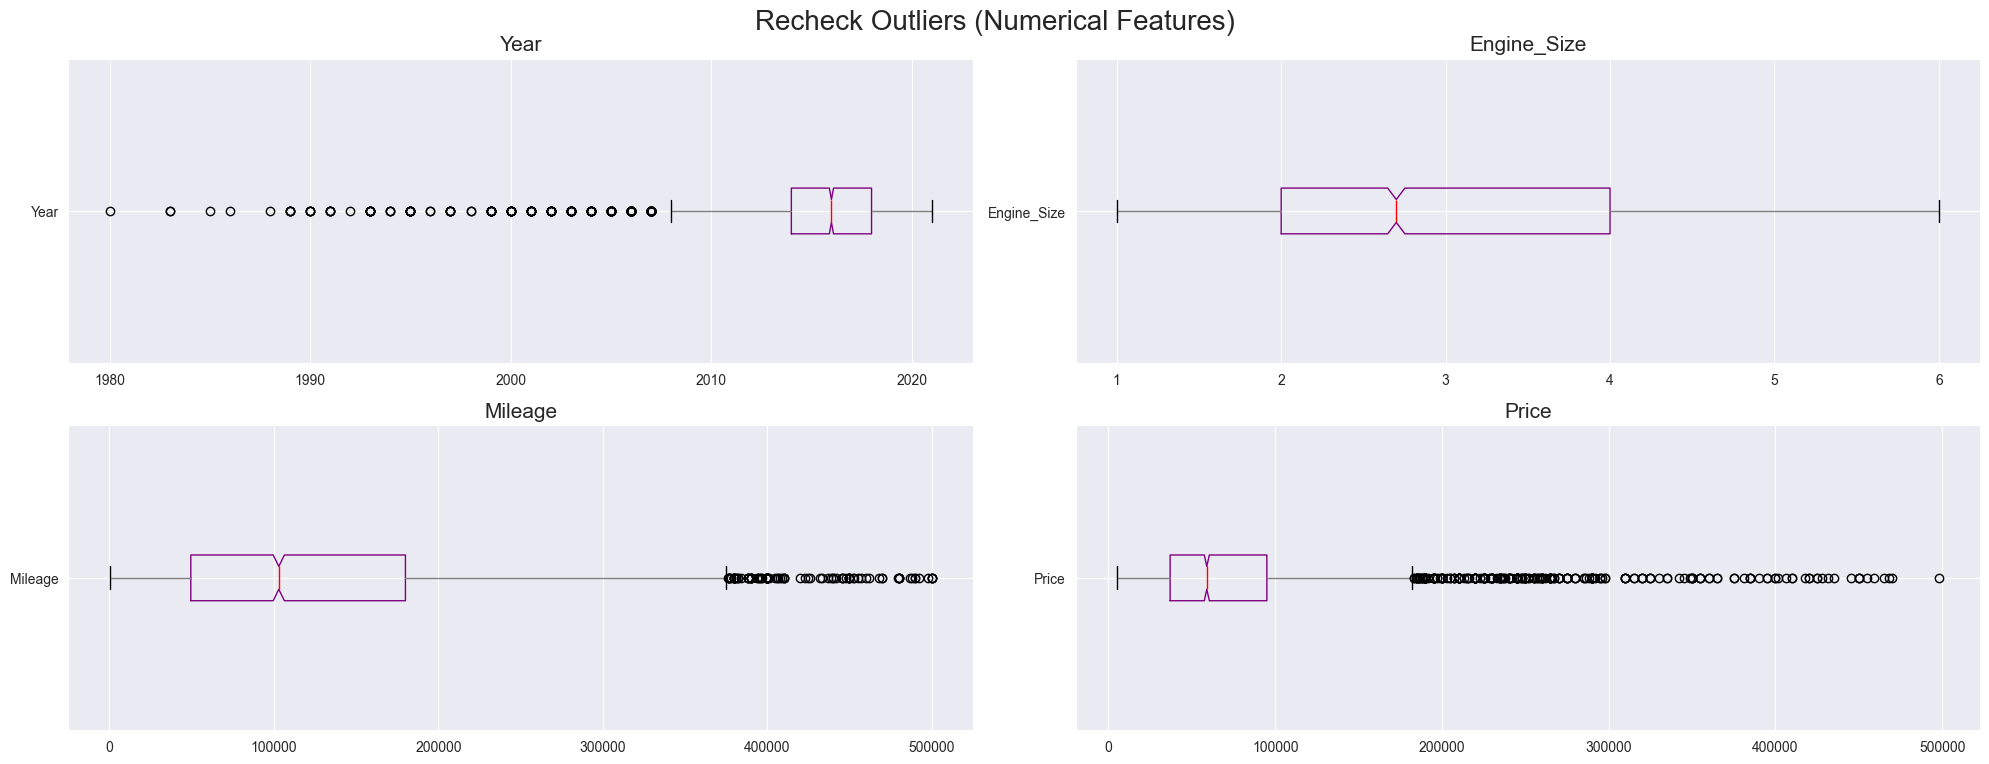

In [45]:
num_features = df.select_dtypes('number')
plot = 1
plt.figure(figsize=(20,15))
for feature in num_features:
  plt.subplot(4,2,plot)
  df.boxplot(column=feature, whis=1.5, grid=True, vert=False, notch=True, color=dict(boxes='purple', whiskers='Gray', medians='Red', caps='Black'))
  plt.title(feature, size=15)
  plt.tight_layout()
  plot += 1
plt.suptitle('Recheck Outliers (Numerical Features)', size=20)
plt.tight_layout()
plt.show()

**Final Dataset**

In [46]:
display(df.describe(include='object'), df.describe())

,Type,Region,Make,Gear_Type,Origin,Options
count,3623,3623,3623,3623,3623,3623
unique,309,27,53,2,3,3
top,Accent,Riyadh,Toyota,Automatic,Saudi,Full
freq,146,1547,848,3258,2739,1378


,Year,Engine_Size,Mileage,Price
count,3623.000000,3623.000000,3623.000000,3623.000000
mean,2014.999172,3.108253,125402.766216,78031.082804
std,4.699501,1.358279,102467.432541,66564.006132
min,1980.000000,1.000000,100.000000,5000.000000
25%,2014.000000,2.000000,49499.000000,37000.000000
50%,2016.000000,2.700000,103000.000000,59000.000000
75%,2018.000000,4.000000,180000.000000,95000.000000
max,2021.000000,6.000000,500000.000000,498000.000000


In [47]:
pd.DataFrame({
  'feature' : df.columns.values,
  'data_type' : df.dtypes.values,
  'n_unique' : df.nunique().values,
  'sample_unique' : [df[i].unique() for i in df.columns]
})

,feature,data_type,n_unique,sample_unique
0,Type,object,309,"[Range Rover, Optima, CX3, Cayenne S, Sonata, ..."
1,Region,object,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam,..."
2,Make,object,53,"[Land Rover, Kia, Mazda, Porsche, Hyundai, Toy..."
3,Gear_Type,object,2,"[Automatic, Manual]"
4,Origin,object,3,"[Gulf Arabic, Saudi, Other]"
5,Options,object,3,"[Full, Semi Full, Standard]"
6,Year,int64,38,"[2015, 2019, 2012, 2016, 2013, 2011, 2008, 202..."
7,Engine_Size,float64,49,"[5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, 1.4, ..."
8,Mileage,int64,1275,"[140000, 220000, 25000, 189000, 155, 110864, 2..."
9,Negotiable,bool,1,[False]


Because of `Negotiable` just have one nunique value, it become unnecessary features becasue it doesn't show any usefull information. We should drop to avoid bad influence model performance.

In [48]:
df.drop(columns='Negotiable', inplace=True)

<Axes: >

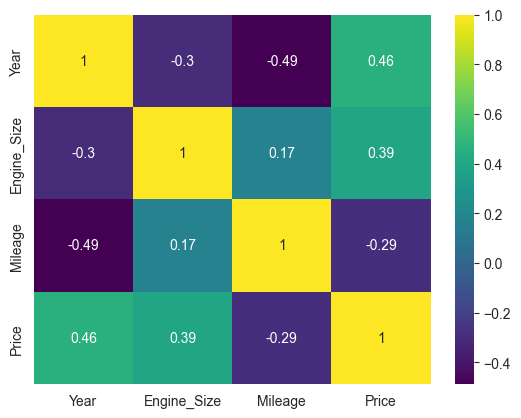

In [49]:
# Features correlation

sns.heatmap(df.select_dtypes('number').corr(method='spearman'), annot=True, cmap='viridis')

**Insight:**

* There aren't strong correlation category between target variable (Price) with explanatory variable. 
* The strongest positive correlation is Year. The bigger the year, the higher the price. This is expected as the price of the used cars decrease for every years.
* The strongest negative correlation is Mileage. The bigger the mileage, the lower the price. 

In [50]:
# save cleaned dataset
df.to_csv('cleaned_data.csv', index=False)